# DNN Keras CIFAR10

In [20]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [22]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.fit_transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [23]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [24]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 93us/step - loss: 1.8345 - acc: 0.3460 - val_loss: 1.7211 - val_acc: 0.3818
Epoch 2/100
50000/50000 [==============================] - 5s 90us/step - loss: 1.6485 - acc: 0.4184 - val_loss: 1.6315 - val_acc: 0.4300
Epoch 3/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.5678 - acc: 0.4446 - val_loss: 1.5487 - val_acc: 0.4539
Epoch 4/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.5100 - acc: 0.4684 - val_loss: 1.6305 - val_acc: 0.4348
Epoch 5/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.4643 - acc: 0.4827 - val_loss: 1.4818 - val_acc: 0.4743
Epoch 6/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.4229 - acc: 0.4986 - val_loss: 1.4839 - val_acc: 0.4663
Epoch 7/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.3884 - acc: 0

In [25]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.63      0.68      0.65      1000
  automobile       0.70      0.65      0.68      1000
        bird       0.49      0.41      0.45      1000
         cat       0.39      0.42      0.40      1000
        deer       0.51      0.51      0.51      1000
         dog       0.48      0.51      0.49      1000
        frog       0.62      0.65      0.63      1000
       horse       0.62      0.63      0.63      1000
        ship       0.71      0.69      0.70      1000
       truck       0.63      0.60      0.62      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



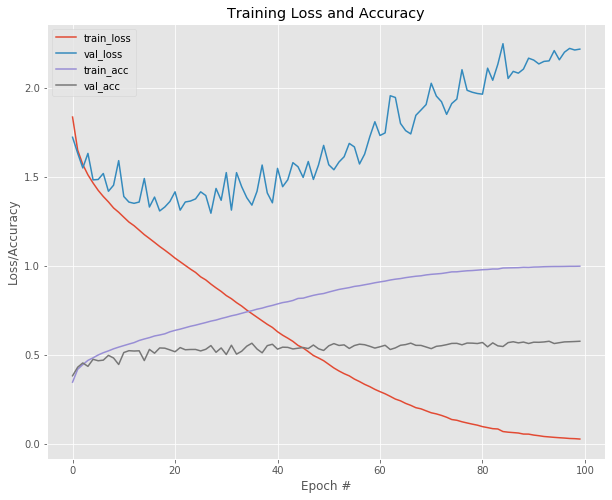

In [26]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()